In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Back testing bollinger band trading strategy

In [2]:
# import stock data from yahoo
spy = pdr.DataReader("spy",data_source = "yahoo", start = "2012-01-01", end = "2021-12-31")


In [53]:
spy.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,477.309998,472.010010,472.059998,477.260010,56808600.0,473.735535
2021-12-28,478.809998,476.059998,477.720001,476.869995,47274600.0,473.348389
2021-12-29,478.559998,475.920013,476.980011,477.480011,54503000.0,473.953918
2021-12-30,479.000000,475.670013,477.929993,476.160004,55329000.0,472.643646
2021-12-31,476.859985,474.670013,475.640015,474.959991,65237400.0,471.452484


/var/folders/qg/y1d1577d6_zdj2rfwsn6lwsh0000gn/T/ipykernel_32086/635276365.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = spy["2019"]


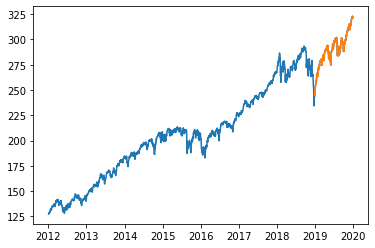

In [4]:
train = spy[:"2019"]
test = spy["2019"]

plt.plot(train.index, train.Close)
plt.plot(test.index, test.Close)

<AxesSubplot:xlabel='Date'>

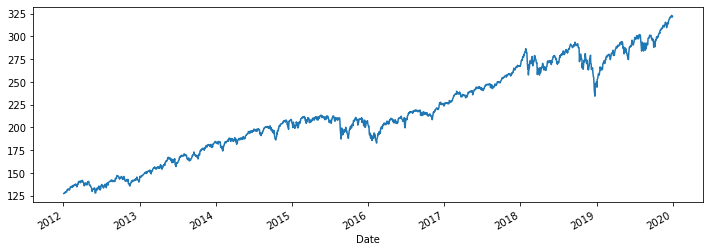

In [5]:
#plotting the closing price and sizing the chart
train["Close"].plot(figsize = (12,4))


<AxesSubplot:xlabel='Date'>

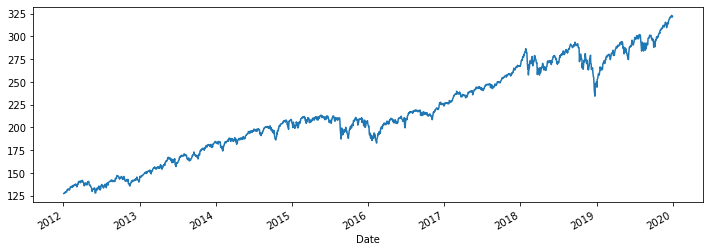

In [6]:
# set xlimit and y limit
train["Close"].plot(figsize = (12,4))


<AxesSubplot:xlabel='Date'>

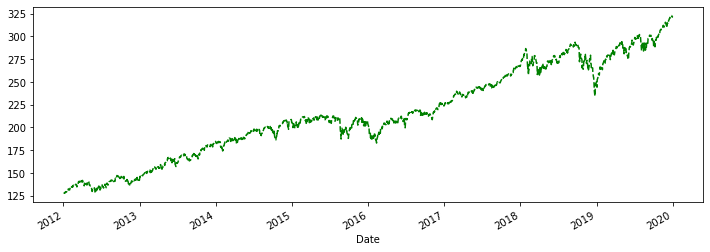

In [7]:
# add color and line type
train["Close"].plot(figsize = (12,4),ls = "--", c= "green")


In [8]:
#to get all the dates
train.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=2012, freq=None)

In [9]:
# figure, axis = plt.subplots()
# plt.tight_layout ()
# #preventing date overlapping
# figure.autofmt_xdate()
# axis.plot(train.index,share_open)

In [10]:
## datetime index

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2012-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2012 non-null   float64
 1   Low        2012 non-null   float64
 2   Open       2012 non-null   float64
 3   Close      2012 non-null   float64
 4   Volume     2012 non-null   float64
 5   Adj Close  2012 non-null   float64
dtypes: float64(6)
memory usage: 110.0 KB


In [12]:
# converting to datetime dont do it many times, risk of adding extra columns
train = train.reset_index()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2012 non-null   datetime64[ns]
 1   High       2012 non-null   float64       
 2   Low        2012 non-null   float64       
 3   Open       2012 non-null   float64       
 4   Close      2012 non-null   float64       
 5   Volume     2012 non-null   float64       
 6   Adj Close  2012 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 110.2 KB


In [14]:
train.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,104.499413
1,2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,104.663345
2,2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,104.941994
3,2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,104.671524
4,2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,104.925606


In [15]:
train  = train.set_index(["Date"])

In [16]:
train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,104.499413
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,104.663345
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,104.941994
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,104.671524
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,104.925606


### datetime 

In [17]:
# to measure a functions speed
# you wrap the called function in 
# start_time = datetime.now()
# add _num(num1,num2)
# end_time = datetime.now()
# print(end_time-start_time)

In [18]:
date = datetime(2021,11,21)

In [19]:
date.date()

datetime.date(2021, 11, 21)

In [20]:
date.day

21

In [21]:
date.weekday()

6

# time resampling

In [22]:
train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,104.499413
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,104.663345
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,104.941994
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,104.671524
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,104.925606


In [23]:
# brings end of year and frequency
# finding minimum value for end of year for all columns and rows
train.resample(rule = "A").min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,127.809998,126.430000,127.010002,127.500000,53874600.0,104.499413
2013-12-31,145.910004,144.729996,145.110001,145.550003,45368800.0,121.938461
2014-12-31,175.559998,173.710007,174.779999,174.169998,42963400.0,148.862259
2015-12-31,189.740005,182.399994,187.490005,187.270004,37317800.0,164.712051
2016-12-31,184.100006,181.020004,182.339996,182.860001,36697800.0,162.631622
2017-12-31,225.830002,223.880005,225.039993,225.240005,27856500.0,204.625183
2018-12-31,240.839996,233.759995,235.970001,234.339996,35717000.0,221.153687
2019-12-31,248.570007,243.669998,245.979996,244.210007,20270000.0,230.468246


In [24]:
train.resample(rule = "A").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,148.110001,146.759995,146.940002,147.240005,319615900.0,121.835266
2013-12-31,184.690002,183.929993,184.100006,184.690002,321255900.0,157.853622
2014-12-31,212.970001,208.250000,208.309998,208.720001,380715000.0,181.877731
2015-12-31,213.779999,212.910004,213.240005,213.500000,507244300.0,186.982101
2016-12-31,228.339996,227.000000,227.410004,227.759995,333444400.0,205.702072
2017-12-31,268.600006,267.980011,268.529999,268.200012,172174100.0,248.390198
2018-12-31,293.940002,291.809998,293.089996,293.579987,355026800.0,274.210297
2019-12-31,323.799988,322.279999,323.739990,322.940002,178745400.0,310.539185


<AxesSubplot:xlabel='Date'>

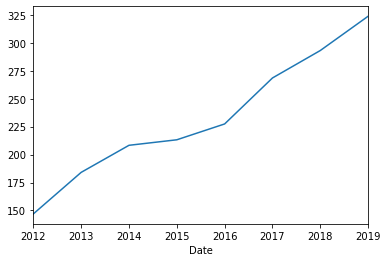

In [25]:
train.resample(rule = "A").max()["Open"].plot()

In [26]:
# quarterly start frequency
train.resample(rule = "QS").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-01,141.830002,141.080002,141.740005,141.610001,202129900.0,116.572647
2012-04-01,142.210007,140.429993,141.639999,141.839996,319615900.0,116.761971
2012-07-01,148.110001,146.759995,146.940002,147.240005,236768900.0,121.835266
2012-10-01,147.160004,145.699997,146.910004,146.199997,264304500.0,121.620468
2013-01-01,156.850006,155.910004,156.309998,156.729996,245824800.0,131.838394
2013-04-01,169.070007,166.610001,167.339996,167.169998,321255900.0,140.674225
2013-07-01,173.600006,172.589996,173.520004,173.050003,203460600.0,146.392761
2013-10-01,184.690002,183.929993,184.100006,184.690002,234906000.0,157.853622
2014-01-01,189.020004,187.779999,188.960007,188.259995,254837100.0,160.904892


<AxesSubplot:xlabel='Date'>

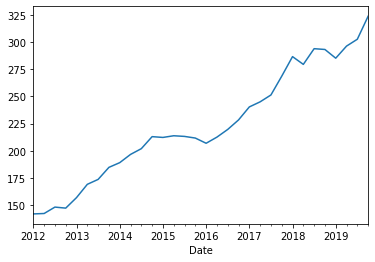

In [27]:
# quarterly
train.resample(rule = "QS").max()["High"].plot()

In [28]:
#business endof year frequency
train.resample(rule = "BA").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,148.110001,146.759995,146.940002,147.240005,319615900.0,121.835266
2013-12-31,184.690002,183.929993,184.100006,184.690002,321255900.0,157.853622
2014-12-31,212.970001,208.250000,208.309998,208.720001,380715000.0,181.877731
2015-12-31,213.779999,212.910004,213.240005,213.500000,507244300.0,186.982101
2016-12-30,228.339996,227.000000,227.410004,227.759995,333444400.0,205.702072
2017-12-29,268.600006,267.980011,268.529999,268.200012,172174100.0,248.390198
2018-12-31,293.940002,291.809998,293.089996,293.579987,355026800.0,274.210297
2019-12-31,323.799988,322.279999,323.739990,322.940002,178745400.0,310.539185
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# showing quarterly data
train.resample(rule = "BQS").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,141.830002,141.080002,141.740005,141.610001,202129900.0,116.572647
2012-04-02,142.210007,140.429993,141.639999,141.839996,319615900.0,116.761971
2012-07-02,148.110001,146.759995,146.940002,147.240005,236768900.0,121.835266
2012-10-01,147.160004,145.699997,146.910004,146.199997,264304500.0,121.620468
2013-01-01,156.850006,155.910004,156.309998,156.729996,245824800.0,131.838394
2013-04-01,169.070007,166.610001,167.339996,167.169998,321255900.0,140.674225
2013-07-01,173.600006,172.589996,173.520004,173.050003,203460600.0,146.392761
2013-10-01,184.690002,183.929993,184.100006,184.690002,234906000.0,157.853622
2014-01-01,189.020004,187.779999,188.960007,188.259995,254837100.0,160.904892


<AxesSubplot:xlabel='Date'>

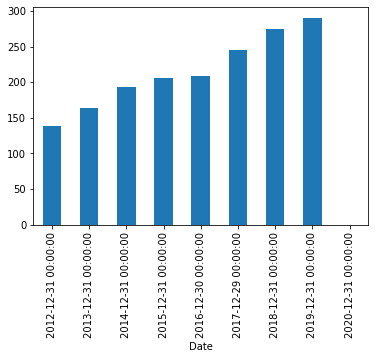

In [30]:
# plotting yearly data 
train["Open"].resample(rule = "BA").mean().plot(kind = "bar")

<AxesSubplot:xlabel='Date'>

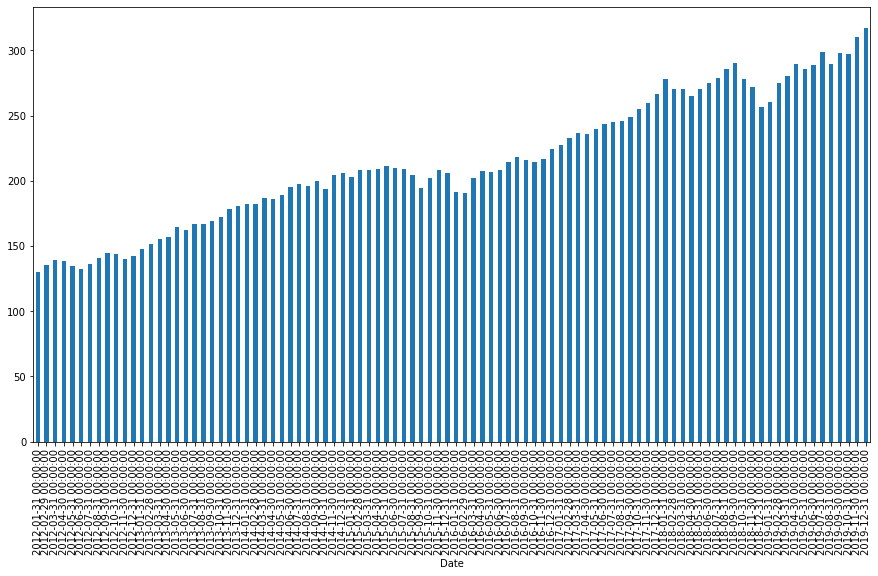

In [31]:
# plotting monthly data
train["Close"].resample(rule = "M").mean().plot(kind = "bar",figsize = (15, 8))

# Rolling

In [32]:
# rolling on the first 10 Highs down 10 places and finds the average of that 10th day with the first day
# ["Close"].rolling(7).mean().head(20)

In [33]:
# ['Close'].head(20)

In [34]:
# ["200_day_ma"]= ['Close'].rolling(200).mean()


In [35]:
# ["50_day_ma"]= ['Close'].rolling(50).mean()
# .head(31)

In [36]:
# closing MA
# [["Close", "200_day_ma"]].plot(figsize = (16,8))
# [["Close", "50_day_ma"]].plot(figsize = (16,8))


In [37]:
#simple moving average (first move by the rolling digit then+ 1 after the initial move),kinda smoothening curve
train["sma"] =train ["Close"].rolling(window = 20, min_periods =1).mean()
train.head()

,High,Low,Open,Close,Volume,Adj Close,sma
Date,,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,104.499413,127.500000
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,104.663345,127.599998
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,104.941994,127.746663
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,104.671524,127.737497
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,104.925606,127.793999


In [38]:
train["stdev"] = train.Close.rolling(window = 20).std()

In [39]:
# creating bollingerbands 
train["upper_bb"] = train.sma+ 2*train.stdev
train["lower_bb"] = train.sma- 2*train.stdev


In [40]:
# defining buy whenever the lower is above the close price
train["buy_signal"] = np.where (train.lower_bb > train.Close,True,False)

In [41]:
# defining sell whenever the upper is above the close price

train["sell_signal"] = np.where (train.upper_bb < train.Close,True,False)

<AxesSubplot:xlabel='Date'>

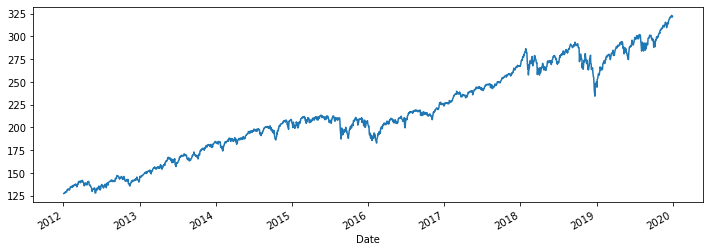

In [42]:
train["Close"].plot(figsize = (12,4))


In [43]:
train = train.dropna()
train.head()

,High,Low,Open,Close,Volume,Adj Close,sma,stdev,upper_bb,lower_bb,buy_signal,sell_signal
Date,,,,,,,,,,,,
2012-01-31,132.179993,130.679993,132.020004,131.320007,157212000.0,107.630295,130.059501,1.719302,133.498105,126.620896,False,False
2012-02-01,133.139999,132.130005,132.289993,132.470001,166234500.0,108.572807,130.308001,1.688793,133.685587,126.930414,False,False
2012-02-02,133.020004,132.210007,132.729996,132.679993,113090400.0,108.744965,130.557000,1.650727,133.858454,127.255547,False,False
2012-02-03,134.619995,133.770004,134.000000,134.539993,160598500.0,110.269409,130.882000,1.765003,134.412007,127.351994,False,True
2012-02-06,134.509995,133.830002,133.979996,134.449997,107694500.0,110.195663,131.219000,1.770922,134.760844,127.677157,False,False


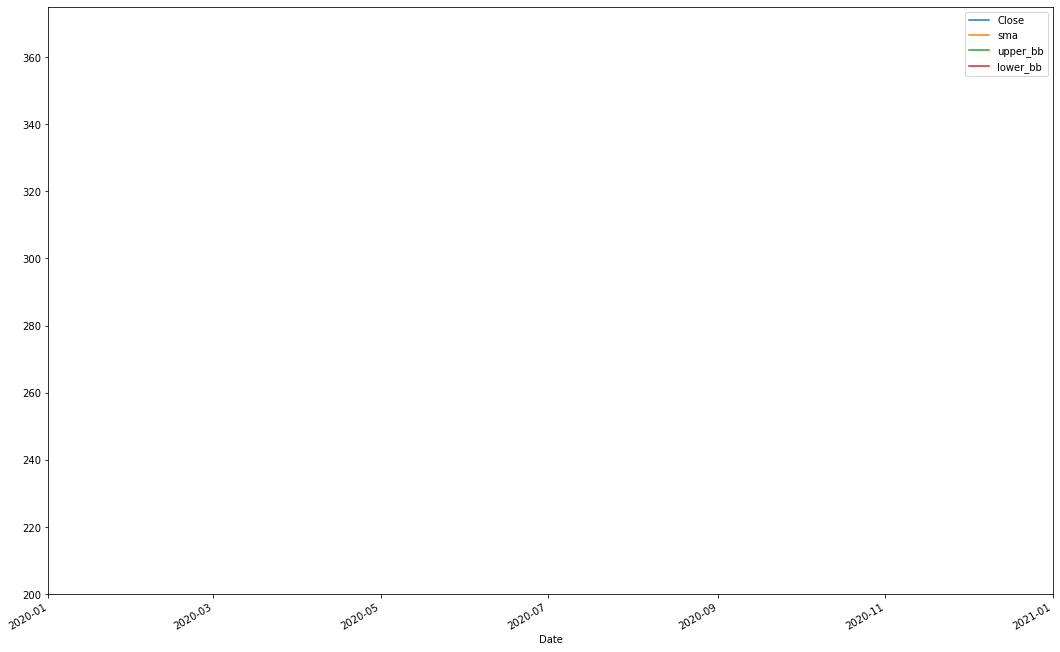

In [44]:
train[["Close", "sma", "upper_bb","lower_bb"]].plot(xlim = ["2020","2021"],ylim = [200,375], figsize = (18,12))
plt.fill_between(train.index, train.upper_bb, train.lower_bb, color= "grey", alpha = 0.3)


In [45]:
# trading strategy
buys = []
sells= []
open_position = False
for row in range(len(train)):
    if train.lower_bb[row]>train.Close[row]:
        if open_position ==False:
            buys.append(row)
            open_position = True
    elif train.upper_bb[row]<train.Close[row]:
        if open_position:
            sells.append(row)
            open_position = False

In [46]:
buys

[48,
 185,
 337,
 424,
 498,
 628,
 665,
 1107,
 1160,
 1292,
 1360,
 1391,
 1513,
 1612,
 1685,
 1831,
 1887,
 1929]

In [47]:
sells

[107,
 222,
 405,
 431,
 582,
 662,
 1056,
 1140,
 1222,
 1315,
 1372,
 1412,
 1579,
 1640,
 1795,
 1867,
 1911,
 1980]

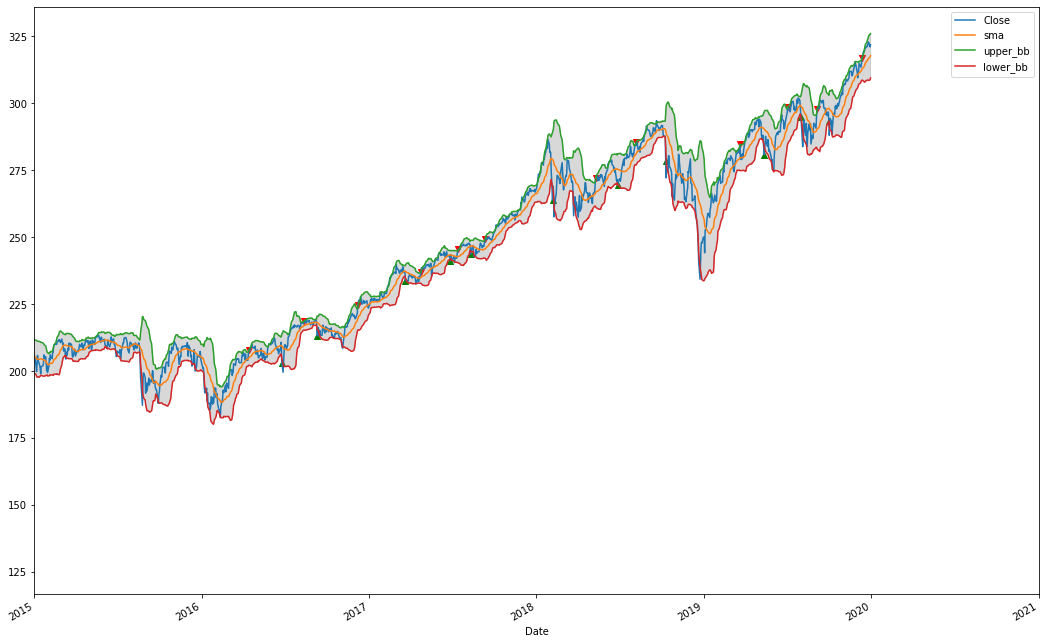

In [55]:
train[["Close", "sma", "upper_bb","lower_bb"]].plot(xlim = ["2015","2021"], figsize = (18,12))
plt.scatter(train.iloc[buys].index, train.iloc[buys].Close, marker = "^", color = "g")
plt.scatter(train.iloc[sells].index, train.iloc[sells].Close, marker = "v", color = "r")
plt.fill_between(train.index, train.upper_bb, train.lower_bb, color= "grey", alpha = 0.3)



In [49]:
merged = pd.concat([train.iloc[buys].Close, train.iloc[sells].Close], axis = 1)
merged.columns = ["Buys","Sells"]
merged.head()

,Buys,Sells
Date,,
2012-04-10,135.899994,NaN
2012-07-03,NaN,137.410004
2012-10-23,141.419998,NaN
2012-12-18,NaN,145.369995
2013-06-05,161.270004,NaN


In [50]:
total_profit = merged.shift(-1).Sells-merged.Buys
total_profit

Date
2012-04-10     1.510010
2012-07-03          NaN
2012-10-23     3.949997
2012-12-18          NaN
2013-06-05     8.129990
2013-09-11          NaN
2013-10-08     7.740005
2013-10-17          NaN
2014-01-24    12.630005
2014-05-27          NaN
2014-07-31     8.730011
2014-09-18          NaN
2014-09-23     9.990005
2016-04-13          NaN
2016-06-24    15.409988
2016-08-11          NaN
2016-09-09    11.320007
2016-12-07          NaN
2017-03-21     3.440002
2017-04-24          NaN
2017-06-27     4.229996
2017-07-14          NaN
2017-08-10     5.450012
2017-09-11          NaN
2018-02-05     8.089996
2018-05-10          NaN
2018-06-27    16.229980
2018-08-07          NaN
2018-10-10     6.430023
2019-03-21          NaN
2019-05-13    17.940002
2019-07-03          NaN
2019-08-01     2.980011
2019-09-05          NaN
2019-10-01    23.890015
2019-12-12          NaN
dtype: float64

In [51]:
relative_profit = (merged.shift(-1).Sells-merged.Buys)/merged.Buys
relative_profit

Date
2012-04-10    0.011111
2012-07-03         NaN
2012-10-23    0.027931
2012-12-18         NaN
2013-06-05    0.050412
2013-09-11         NaN
2013-10-08    0.046773
2013-10-17         NaN
2014-01-24    0.070602
2014-05-27         NaN
2014-07-31    0.045212
2014-09-18         NaN
2014-09-23    0.050452
2016-04-13         NaN
2016-06-24    0.075822
2016-08-11         NaN
2016-09-09    0.053076
2016-12-07         NaN
2017-03-21    0.014718
2017-04-24         NaN
2017-06-27    0.017528
2017-07-14         NaN
2017-08-10    0.022358
2017-09-11         NaN
2018-02-05    0.030652
2018-05-10         NaN
2018-06-27    0.060256
2018-08-07         NaN
2018-10-10    0.023105
2019-03-21         NaN
2019-05-13    0.063875
2019-07-03         NaN
2019-08-01    0.010107
2019-09-05         NaN
2019-10-01    0.081469
2019-12-12         NaN
dtype: float64

In [52]:
relative_profit.mean()

0.0419699659715522